In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import os
import openpyxl
import seaborn as sns

pd.set_option("display.min_rows", 10)
pd.set_option('display.max_columns', None)

In [2]:
class GetDataFrame:
    EQUIPMENT_LIST = ("CW500Viewer", "equip2")

    def __init__(self, equip_model: str, file_path: str):
        if equip_model not in self.EQUIPMENT_LIST:
            raise ValueError(f"equip_model must be one of {self.EQUIPMENT_LIST}. Got: {equip_model}")

        self.equip_model = equip_model
        self.file_path = file_path
        self.df = None  

    def load(self) -> pd.DataFrame:
        if self.equip_model == "CW500Viewer":
            self.df = self._get_and_clean_cw500_df()
            return self.df
            
        elif self.equip_model == "equip2":
            self.df = self._get_and_clean_equip2_df()
            return self.df
  
        raise ValueError(f"Unsupported equip_model: {self.equip_model}")

    def _get_and_clean_cw500_df(self) -> pd.DataFrame:
        df = pd.read_csv(self.file_path, sep=';', decimal=',', skiprows=37)

        rename_map = { 'MIN_A1[A][A]': 'Ia_min', 'MIN_A2[A][A]': 'Ib_min', 'MIN_A3[A][A]': 'Ic_min',
                       'AVG_A1[A][A]': 'Ia_avg', 'AVG_A2[A][A]': 'Ib_avg', 'AVG_A3[A][A]': 'Ic_avg',
                       'MAX_A1[A][A]': 'Ia_max', 'MAX_A2[A][A]': 'Ib_max', 'MAX_A3[A][A]': 'Ic_max',
                       'MIN_An[A][A]': 'In_min', 'AVG_An[A][A]': 'In_avg', 'MAX_An[A][A]': 'In_max',
                        
                     }
        df = df.rename(columns=rename_map)

        cols = ['DateTime', 'Ia_min', 'Ib_min', 'Ic_min', 'In_min', 'Ia_avg', 'Ib_avg', 'Ic_avg', 'In_avg','Ia_max', 'Ib_max', 'Ic_max', 'In_max']
        df = df[cols]
        
        df["DateTime"] = pd.to_datetime(df["DateTime"], format="%Y/%m/%d %H:%M:%S")
        
        num_cols = cols[1:]
        df[num_cols] = df[num_cols].astype(float)

        return df

    def _get_and_clean_equip2_df(self) -> pd.DataFrame:
        df = pd.read_excel(path)
        if "Registro" in df.columns:
            df = df.rename(columns={'Registro': 'DateTime'})
        elif "time" in df.columns:
            df = df.rename(columns={'time': 'DateTime'})

        rename_map = { 'Ia min [A]': 'Ia_min', 'Ib min [A]': 'Ib_min', 'Ic min [A]': 'Ic_min',
                       'Ia avg [A]': 'Ia_avg', 'Ib avg [A]': 'Ib_avg', 'Ic avg [A]': 'Ic_avg',
                       'Ia max [A]': 'Ia_max', 'Ib max [A]': 'Ib_max', 'Ic max [A]': 'Ic_max',
                       'In [A]': 'In'
                     }     
        df = df.rename(columns=rename_map)
        
        mask = df.map(lambda x: isinstance(x, str)).any(axis=1)
        df = df[~mask].reset_index(drop=True)

        
        cols = ['DateTime', 'Ia_min', 'Ib_min', 'Ic_min', 'Ia_avg', 'Ib_avg', 'Ic_avg', 'Ia_max', 'Ib_max', 'Ic_max', 'In']
        df = df[cols]

        df["DateTime"] = pd.to_datetime(df["DateTime"], format="%Y/%m/%d %H:%M:%S")
        
        num_cols = cols[1:]
        df[num_cols] = df[num_cols].astype(float)
        
        return df

In [3]:
equip_model = 'equip2'

In [4]:
if equip_model == 'CW500Viewer':
    _dir = r"..\00_data\CW500Viewer\0_data_TR_DT_DC_PST_FP"
    files = [file for file in os.listdir(_dir) if file.endswith(".csv")]
elif equip_model == "equip2":
    _dir = r"..\00_data\Arquivos_CD_Rennner\CD_Rennner_files"
    files = [file for file in os.listdir(_dir) if file.endswith(".xlsx")]

list(zip(list(range(len(files))),files))

[(0, 'Compressores_Medicoes.xlsx'),
 (1, 'CP02_Medicoes.xlsx'),
 (2, 'Subestacao_Medicoes.xlsx')]

In [5]:
path = os.path.join(_dir, files[2])
path

'..\\00_data\\Arquivos_CD_Rennner\\CD_Rennner_files\\Subestacao_Medicoes.xlsx'

In [6]:
df = GetDataFrame(equip_model, path).load()
df

,DateTime,Ia_min,Ib_min,Ic_min,Ia_avg,Ib_avg,Ic_avg,Ia_max,Ib_max,Ic_max,In
0,2021-02-25 10:40:00,461.17,448.22,447.10,508.78,489.94,491.78,559.25,539.30,541.82,60.74
1,2021-02-25 10:50:00,475.43,476.26,476.73,515.02,503.25,505.65,601.14,572.89,589.86,54.70
2,2021-02-25 11:00:00,483.67,467.45,469.49,517.54,502.94,507.06,570.63,561.08,563.51,54.59
3,2021-02-25 11:10:00,381.19,369.86,368.29,434.99,420.16,417.43,805.47,767.06,788.03,43.24
4,2021-02-25 11:20:00,367.69,352.24,364.90,401.78,389.93,393.17,466.99,459.90,457.60,32.82
...,...,...,...,...,...,...,...,...,...,...,...
1989,2021-03-11 10:30:00,448.30,459.08,451.00,482.24,488.78,480.86,535.38,544.13,539.37,36.50
1990,2021-03-11 10:40:00,456.76,458.37,462.28,479.73,488.21,487.92,533.04,541.48,538.99,40.79
1991,2021-03-11 10:50:00,439.62,456.15,447.04,476.55,483.39,479.03,545.29,539.24,540.04,48.41
1992,2021-03-11 11:00:00,464.62,462.66,452.66,488.59,486.52,481.02,532.71,527.38,526.44,50.89


# Define Parameters

In [7]:
Workday = {
    "H_DAY": dt.time(7, 0, 0),
    "H_PEAK": dt.time(18, 0, 0),
    "H_EVENING": dt.time(21, 0, 0),
    "H_NIGHT": dt.time(23, 59, 59),
}

weekdays = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday",
}

# Create DF with just 1008 measurement points

In [8]:
data_CU = df.iloc[0:1008].copy()
data_CU["Weekday"] = data_CU["DateTime"].dt.weekday
data_CU["Weekday_EN"] = data_CU["Weekday"].map(weekdays)

# --------- Determine time period (using dict)
data_CU["Time_Type"] = [
    "Day: 07h-18h" if (t >= Workday["H_DAY"]) and (t < Workday["H_PEAK"]) else
    "Peak: 18h-21h" if (t >= Workday["H_PEAK"]) and (t < Workday["H_EVENING"]) else
    "Night: 21h-00h" if (t >= Workday["H_EVENING"]) and (t < Workday["H_NIGHT"]) else
    "Early_Morning: 00h-07h"
    for t in data_CU["DateTime"].dt.time
]

data_CU

,DateTime,Ia_min,Ib_min,Ic_min,Ia_avg,Ib_avg,Ic_avg,Ia_max,Ib_max,Ic_max,In,Weekday,Weekday_EN,Time_Type
0,2021-02-25 10:40:00,461.17,448.22,447.10,508.78,489.94,491.78,559.25,539.30,541.82,60.74,3,Thursday,Day: 07h-18h
1,2021-02-25 10:50:00,475.43,476.26,476.73,515.02,503.25,505.65,601.14,572.89,589.86,54.70,3,Thursday,Day: 07h-18h
2,2021-02-25 11:00:00,483.67,467.45,469.49,517.54,502.94,507.06,570.63,561.08,563.51,54.59,3,Thursday,Day: 07h-18h
3,2021-02-25 11:10:00,381.19,369.86,368.29,434.99,420.16,417.43,805.47,767.06,788.03,43.24,3,Thursday,Day: 07h-18h
4,2021-02-25 11:20:00,367.69,352.24,364.90,401.78,389.93,393.17,466.99,459.90,457.60,32.82,3,Thursday,Day: 07h-18h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2021-03-04 11:30:00,321.61,329.59,323.35,354.79,358.63,353.14,400.11,402.74,400.10,23.91,3,Thursday,Day: 07h-18h
1004,2021-03-04 11:40:00,308.11,322.26,314.35,351.57,354.88,347.41,415.36,419.51,401.93,23.50,3,Thursday,Day: 07h-18h
1005,2021-03-04 11:50:00,315.26,329.21,322.93,346.15,364.99,351.69,437.24,411.93,401.86,26.00,3,Thursday,Day: 07h-18h
1006,2021-03-04 12:00:00,247.25,255.81,253.22,286.33,299.74,289.58,351.74,374.01,352.59,17.18,3,Thursday,Day: 07h-18h


# Current Graph

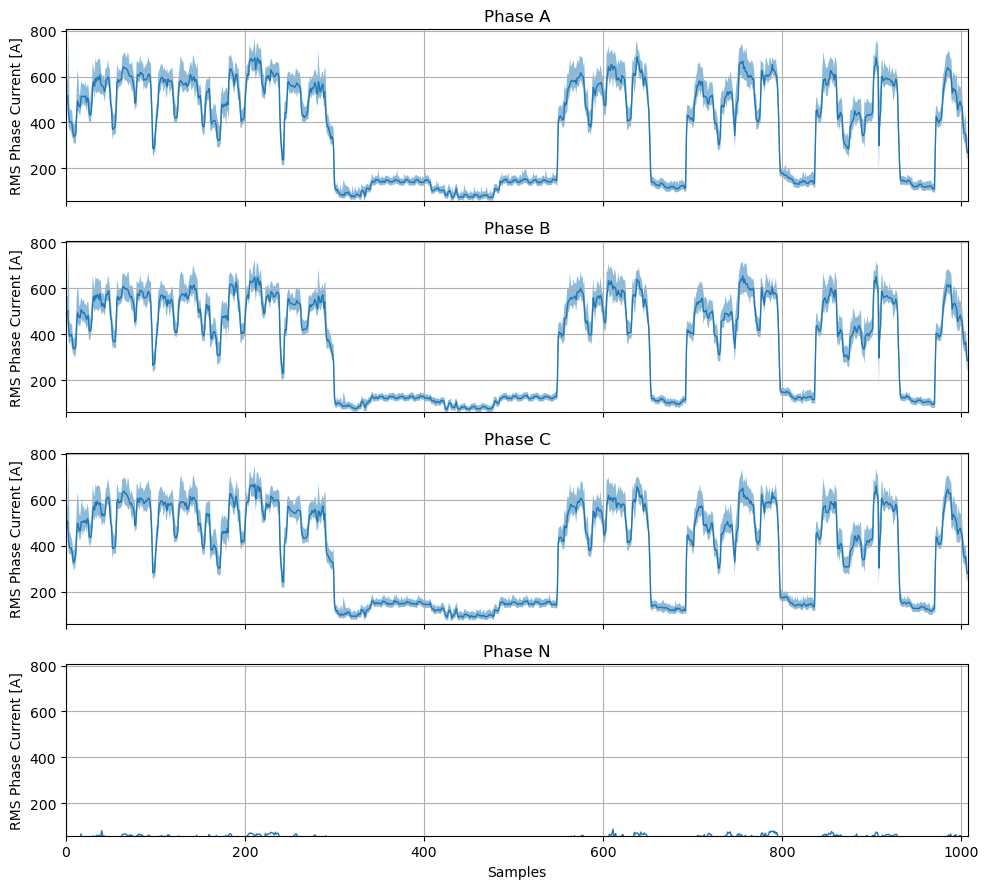

In [9]:
# --------- Generate steady-state current plots
N_STEPS = 1008
t = np.arange(N_STEPS)
x = np.ones(N_STEPS)

Y_plot_max = max(data_CU["Ia_max"].max(), data_CU["Ib_max"].max(), data_CU["Ic_max"].max(),)  
Y_plot_min = min(data_CU["Ia_min"].min(), data_CU["Ib_min"].min(), data_CU["Ic_min"].min(),)
       
def edit_current_plot(ax, I_max, I_min, I_avg, phase):
    ax.grid(True)
    ax.fill_between(t, I_max, I_min, alpha=0.5, linewidth=0)
    ax.plot(t, I_avg, linewidth=1)
    ax.set_ylim([Y_plot_min, Y_plot_max])
    ax.set_xlim([0, N_STEPS])
    ax.set_ylabel("RMS Phase Current [A]")
    ax.set_title(f"Phase {phase}")

fig, (ax1, ax2, ax3, ax4) = plt.subplots(
    nrows=4, ncols=1, sharex=True, figsize=(10, 9)
)

edit_current_plot(ax1, data_CU["Ia_max"], data_CU["Ia_min"], data_CU["Ia_avg"], "A")
edit_current_plot(ax2, data_CU["Ib_max"], data_CU["Ib_min"], data_CU["Ib_avg"], "B")
edit_current_plot(ax3, data_CU["Ic_max"], data_CU["Ic_min"], data_CU["Ic_avg"], "C")
try:
    edit_current_plot(ax4, data_CU["In_max"], data_CU["In_min"], data_CU["In_avg"], "N")
except:
    edit_current_plot(ax4, data_CU["In"], data_CU["In"], data_CU["In"], "N")

ax4.set_xlabel("Samples")
plt.tight_layout()
plt.show()


# Calculate Current Delta

In [10]:
def add_max_variation(df: pd.DataFrame, col_a: str, col_b: str, col_c: str, new_col: str) -> pd.DataFrame:
    arr = df[[col_a, col_b, col_c]].to_numpy(dtype=float)
    df[new_col] = np.nanmax(arr, axis=1) - np.nanmin(arr, axis=1)
    return df


In [11]:
data_CU = add_max_variation(data_CU, 'Ia_min', 'Ib_min', 'Ic_min', 'Delta_Imin')
data_CU = add_max_variation(data_CU, 'Ia_avg', 'Ib_avg', 'Ic_avg', 'Delta_Iavg')
data_CU = add_max_variation(data_CU, 'Ia_max', 'Ib_max', 'Ic_max', 'Delta_Imax')
data_CU.head(2)

,DateTime,Ia_min,Ib_min,Ic_min,Ia_avg,Ib_avg,Ic_avg,Ia_max,Ib_max,Ic_max,In,Weekday,Weekday_EN,Time_Type,Delta_Imin,Delta_Iavg,Delta_Imax
0,2021-02-25 10:40:00,461.17,448.22,447.10,508.78,489.94,491.78,559.25,539.30,541.82,60.74,3,Thursday,Day: 07h-18h,14.07,18.84,19.95
1,2021-02-25 10:50:00,475.43,476.26,476.73,515.02,503.25,505.65,601.14,572.89,589.86,54.70,3,Thursday,Day: 07h-18h,1.30,11.77,28.25


# Unbalance Factor Calculation (FD)

$$
{\Large I_{\text{trafo}} = \frac{500000}{\sqrt{3}\,380}}
$$


In [12]:
Itrafo = 500000/(np.sqrt(3)*380)
Itrafo

np.float64(759.671406828455)

$$
{\Large
\text{FD}_i = \frac{\Delta I_i}{I_{\text{trafo}}}
}
$$


In [13]:
data_CU['FD_min'] = data_CU['Delta_Imin']/Itrafo
data_CU['FD_avg'] = data_CU['Delta_Iavg']/Itrafo
data_CU['FD_max'] = data_CU['Delta_Imax']/Itrafo
data_CU.head(2)

,DateTime,Ia_min,Ib_min,Ic_min,Ia_avg,Ib_avg,Ic_avg,Ia_max,Ib_max,Ic_max,In,Weekday,Weekday_EN,Time_Type,Delta_Imin,Delta_Iavg,Delta_Imax,FD_min,FD_avg,FD_max
0,2021-02-25 10:40:00,461.17,448.22,447.10,508.78,489.94,491.78,559.25,539.30,541.82,60.74,3,Thursday,Day: 07h-18h,14.07,18.84,19.95,0.018521,0.024800,0.026261
1,2021-02-25 10:50:00,475.43,476.26,476.73,515.02,503.25,505.65,601.14,572.89,589.86,54.70,3,Thursday,Day: 07h-18h,1.30,11.77,28.25,0.001711,0.015494,0.037187


# Calculate Percentiles 

In [14]:
p95_fd_min = np.percentile(data_CU['FD_min'], 95)
p95_fd_avg = np.percentile(data_CU['FD_avg'], 95)
p95_fd_max = np.percentile(data_CU['FD_max'], 95)

[p95_fd_min, p95_fd_avg, p95_fd_max]

[np.float64(0.05184412582332928),
 np.float64(0.051156328447643756),
 np.float64(0.06331224206633973)]

# Worst Cases

In [15]:
value_max_min = data_CU['FD_min'].max()
value_max_avg = data_CU['FD_avg'].max()
value_max_max = data_CU['FD_max'].max()

[value_max_min, value_max_avg, value_max_max]

[0.07362393726716876, 0.06956955273681155, 0.10253117242517026]

# Charts

In [16]:
def plot_lollipop(
    df: pd.DataFrame,
    y_col: str,
    weekday_col: str,
    figsize=(16, 4),
    dpi: int = 300,
    y_lim=(0, 1.6),
    draw_boundaries: bool = True,
    shade_alternating: bool = True,
    constant_line_value: float = None,
    constant_line_label: str = "p95_fd_min",
):
    """
    Plots a lollipop chart and adds a secondary top X-axis
    with weekday intervals defined by another DataFrame column.

    Parameters
    ----------
    constant_line_value : float or None
        If provided, draws a horizontal red line at this value.
    constant_line_label : str or None
        Label shown in the legend for the horizontal line.
    """

    n = len(df)
    if n == 0:
        raise ValueError("Empty DataFrame.")

    # X-axis = sequential sample index
    x = np.arange(n)

    # Y series
    y = pd.to_numeric(df[y_col], errors="coerce").to_numpy()

    # Weekday column (as string)
    wd = df[weekday_col].astype(str).to_numpy()

    # --- Base plot (lollipop) ---
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    ax.vlines(x, 0, y, linewidth=0.3)  # thin stems
    ax.scatter(x, y, s=5)              # top points

    ax.set_xlabel("Sample Number", fontsize=16)
    ax.set_ylabel(str(y_col), fontsize=16)

    if y_lim is not None:
        ax.set_ylim(*y_lim)

    ax.grid(True, axis="y", linewidth=0.3, alpha=0.5)

    # --- Constant horizontal line (optional) ---
    if constant_line_value is not None:
        ax.axhline(
            y=constant_line_value,
            color="red",
            linewidth=1,
            label=str(constant_line_label) if constant_line_label else None,
        )
        if constant_line_label:
            ax.legend(loc="upper right", fontsize=9, frameon=False)

    # --- Interval calculation (when weekday changes) ---
    if n > 1:
        change_idx = np.where(wd[1:] != wd[:-1])[0] + 1
    else:
        change_idx = np.array([], dtype=int)

    starts = np.r_[0, change_idx]
    ends = np.r_[change_idx, n]
    mids = (starts + ends - 1) / 2.0
    labels = [wd[s] for s in starts]

    # --- Top axis with weekday labels ---
    ax_top = ax.twiny()
    ax_top.set_xlim(ax.get_xlim())
    ax_top.set_xticks(mids)
    ax_top.set_xticklabels(labels, fontsize=12)
    ax_top.xaxis.set_ticks_position("top")
    ax_top.tick_params(axis="x", which="both", length=0, pad=6)
    ax_top.set_xlabel("Weekdays", fontsize=16, labelpad=8)

    # Boundary lines between weekdays (optional)
    if draw_boundaries and len(change_idx) > 0:
        for idx in change_idx:
            ax.axvline(idx, linestyle="--", linewidth=0.5, alpha=0.5)

    # Alternating block shading (optional)
    if shade_alternating:
        for i, (s, e) in enumerate(zip(starts, ends)):
            if i % 2 == 0:
                ax.axvspan(s - 0.5, e - 0.5, alpha=0.06)

    plt.tight_layout()
    return fig, ax, ax_top


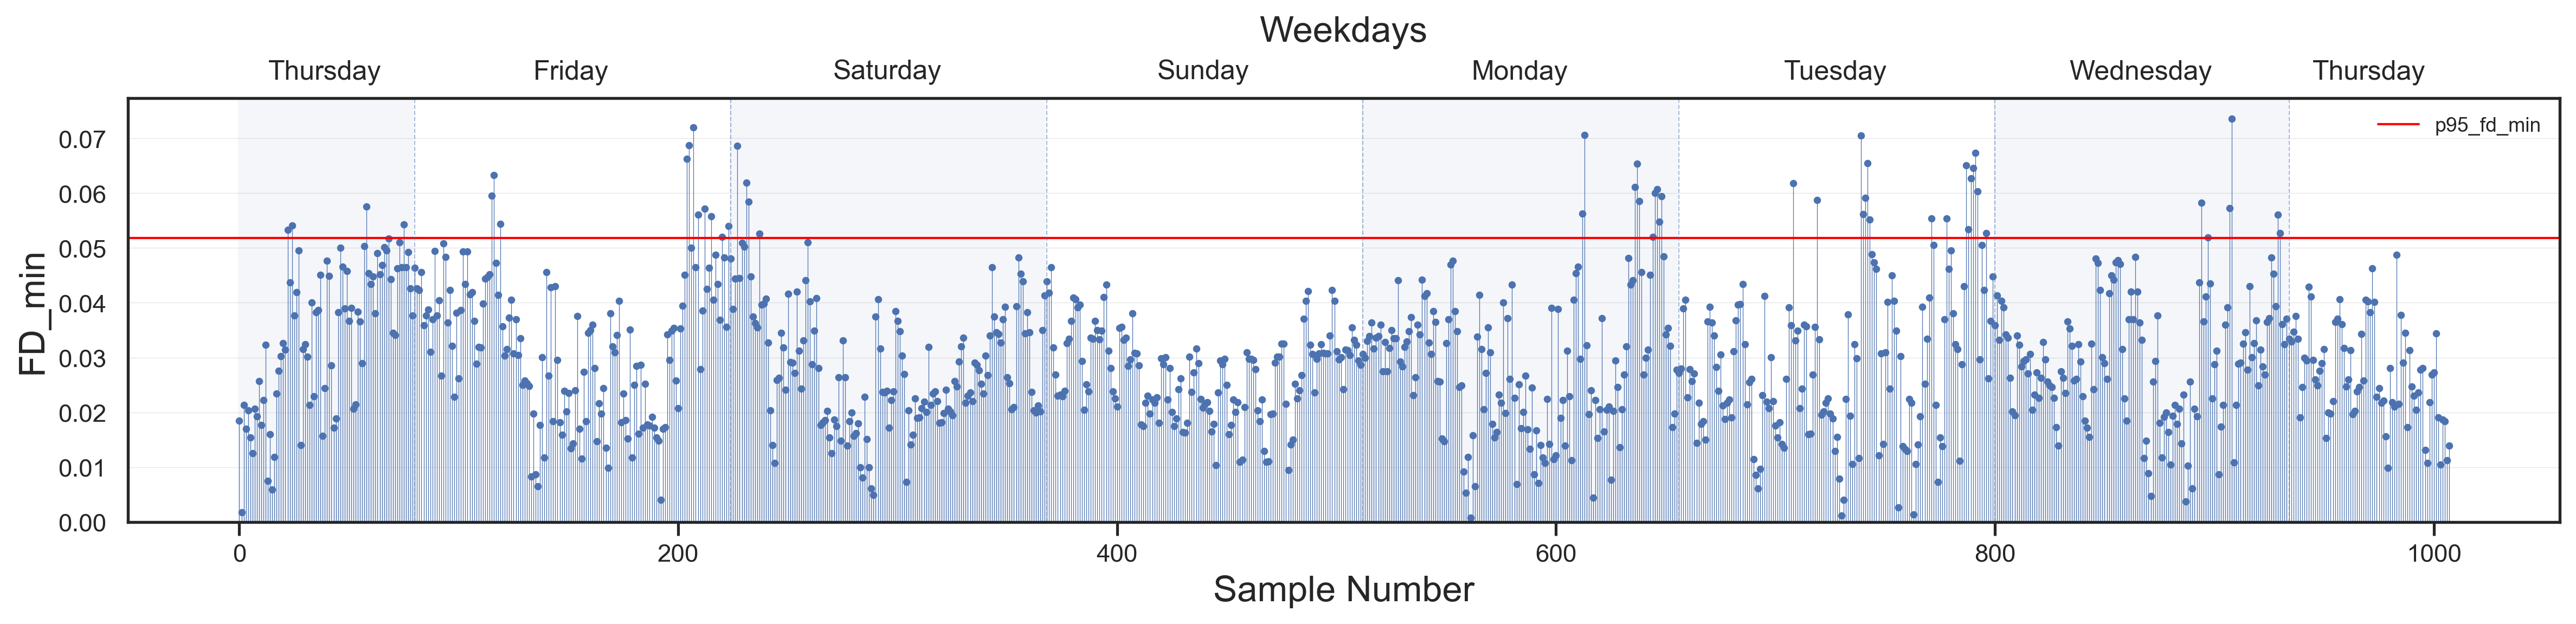

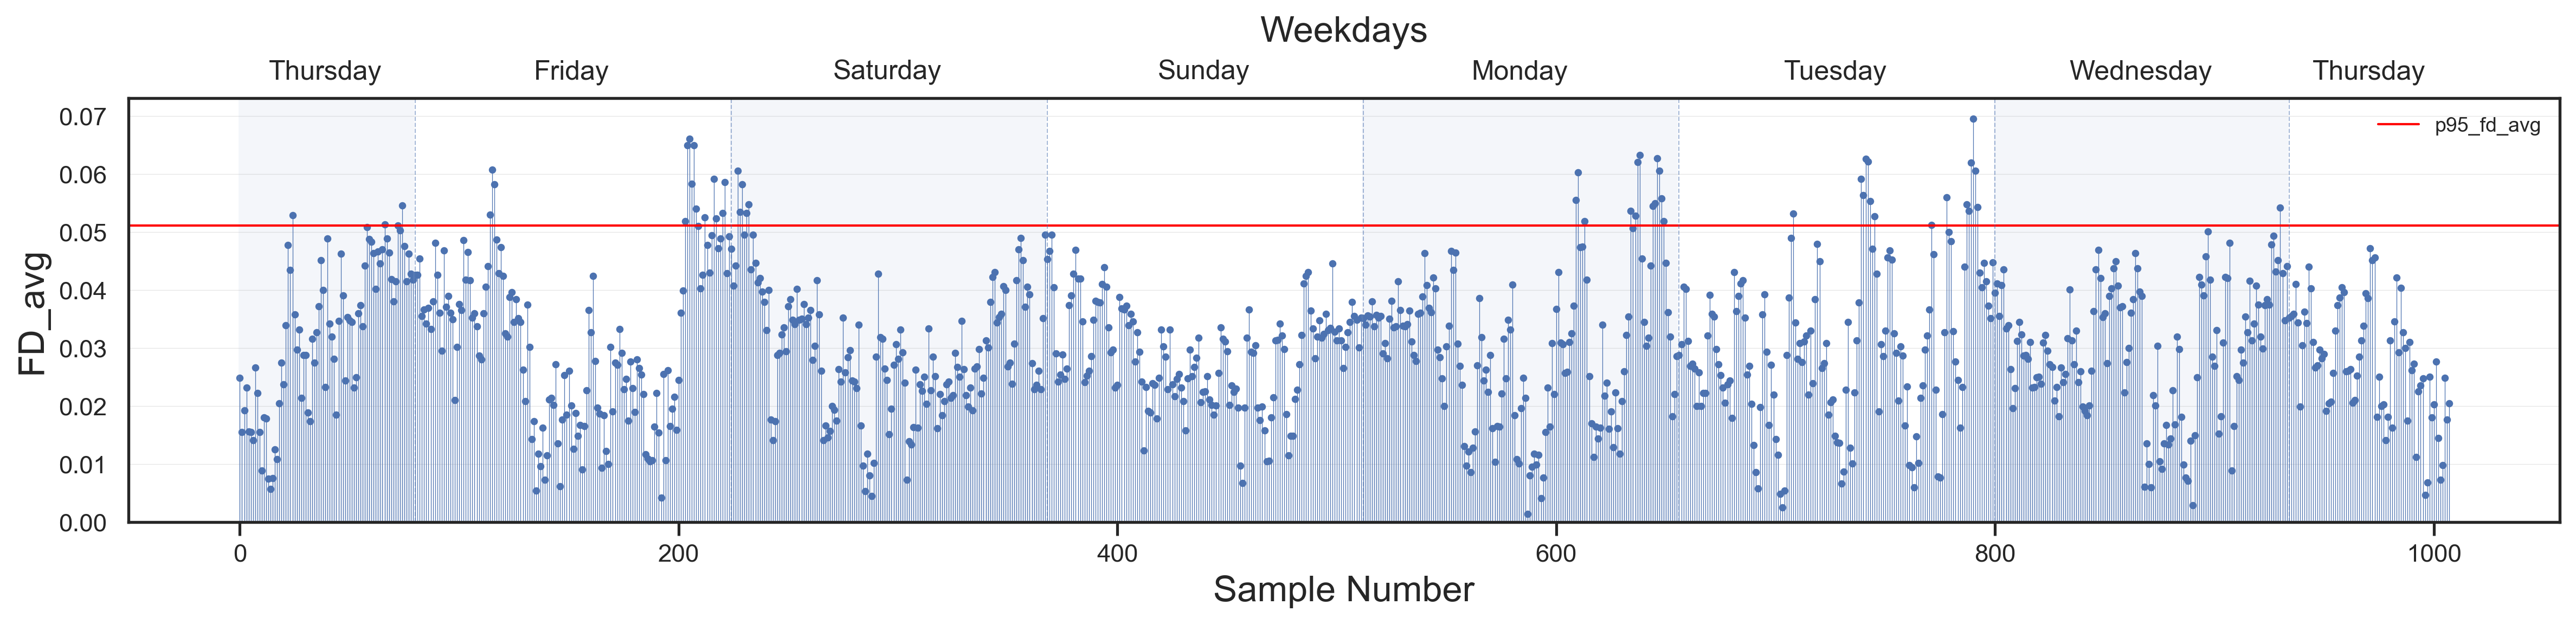

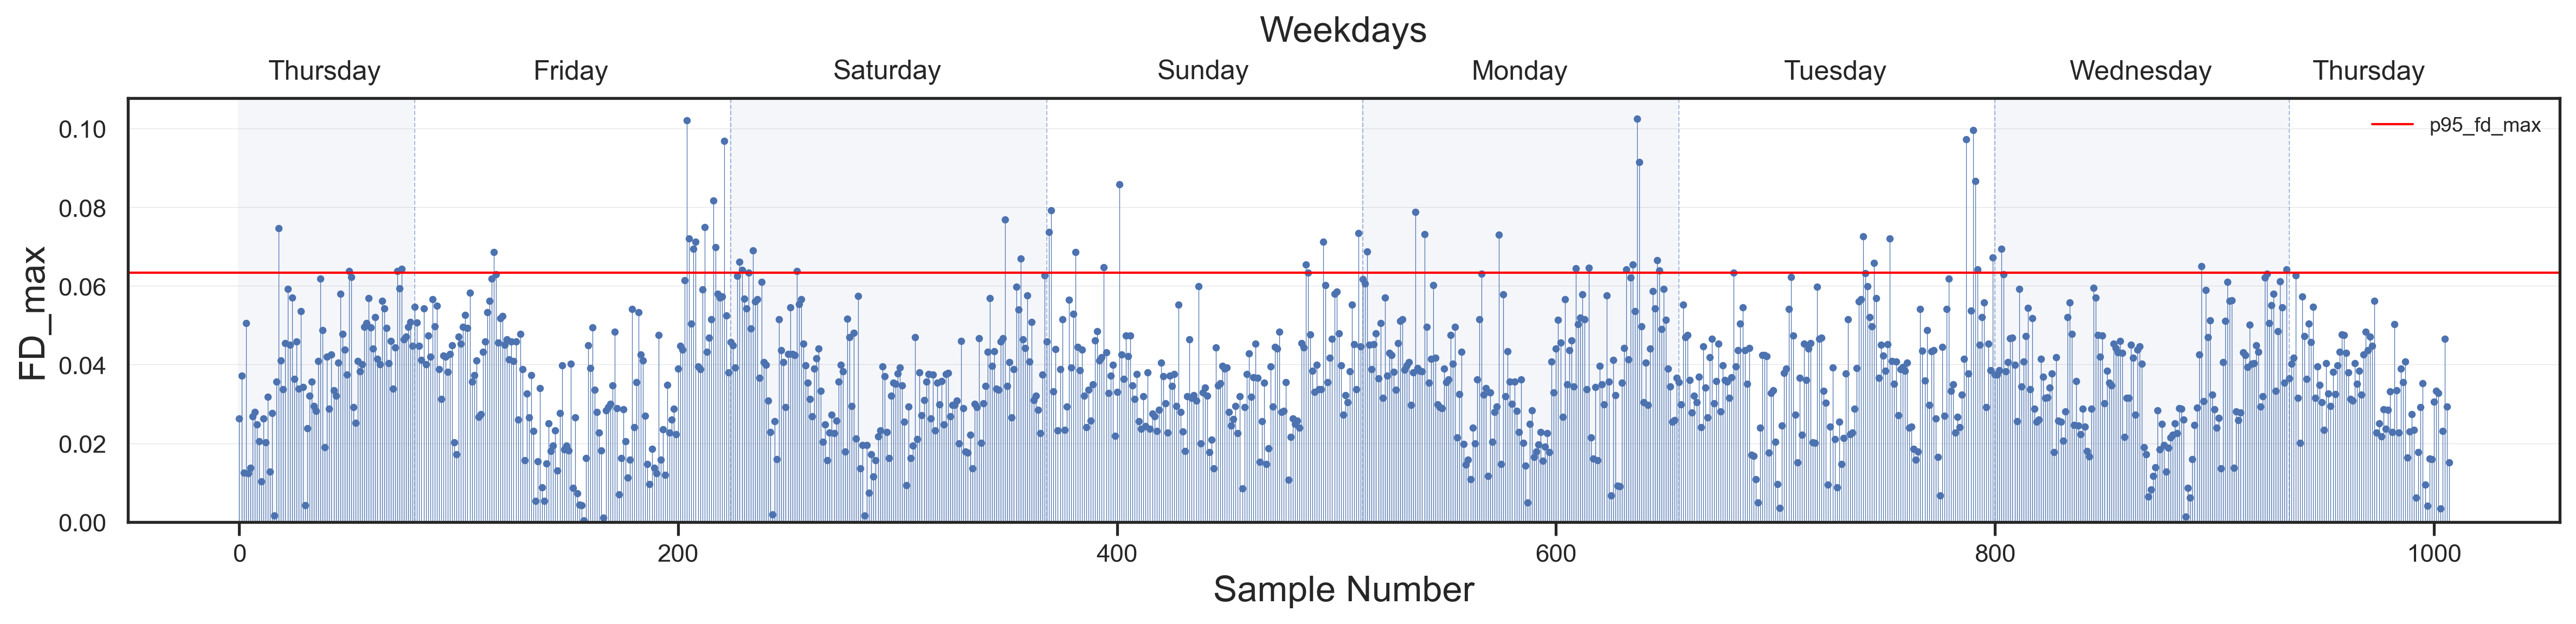

In [22]:
fig = plot_lollipop(data_CU, 'FD_min', 'Weekday_EN', constant_line_value=p95_fd_min, constant_line_label="p95_fd_min", y_lim = (0, data_CU['FD_min'].max()+ data_CU['FD_min'].max()*0.05))
fig = plot_lollipop(data_CU, 'FD_avg', 'Weekday_EN', constant_line_value=p95_fd_avg, constant_line_label="p95_fd_avg", y_lim = (0, data_CU['FD_avg'].max()+ data_CU['FD_avg'].max()*0.05))
fig = plot_lollipop(data_CU, 'FD_max', 'Weekday_EN', constant_line_value=p95_fd_max, constant_line_label="p95_fd_max", y_lim = (0, data_CU['FD_max'].max()+ data_CU['FD_max'].max()*0.05))
plt.show()

# Pie charts

In [18]:
def create_pie_chart_by_time_type_sns(
    df,
    column,
    flag_column,
    threshold_value,
    phase="",
    ax=None,
    startangle=90,
    figsize=(5, 5),
    legend_title="Category",
    title_fontsize=16,
    title_pad=10
):
    sns.set_theme(style="white")

    df = df.copy()
    df[flag_column] = np.where(df[column] > threshold_value, 1, 0)
    mask = df[flag_column] == 1

    counts = df.loc[mask, "Time_Type"].value_counts(dropna=False)
    counts = counts[counts > 0]

    if counts.sum() == 0:
        if ax is None:
            _, ax = plt.subplots(figsize=figsize)
        ax.text(0.5, 0.5, "No data", ha="center", va="center", fontsize=12)
        ax.set_title(f"{phase} | {column} > {threshold_value}", fontsize=title_fontsize, pad=title_pad)
        ax.axis("off")
        return ax

    # Ordenar em ordem decrescente
    counts = counts.sort_values(ascending=False)
    values = counts.values
    labels = counts.index.tolist()
    total = values.sum()
    percentages = values / total * 100

    legend_labels = [f"{label} ({pct:.1f}%)" for label, pct in zip(labels, percentages)]

    if ax is None:
        _, ax = plt.subplots(figsize=figsize)

    colors = sns.color_palette("tab10", len(values))

    wedges = ax.pie(
        values,
        labels=None,  # nada dentro da pizza
        startangle=startangle,
        counterclock=False,
        colors=colors,
        wedgeprops={"linewidth": 1, "edgecolor": "white"},
    )[0]

    ax.axis("equal")
    ax.set_title(f"{phase} | {column} > {threshold_value:.4f} by time of day",
                 fontsize=title_fontsize,
                 pad=title_pad)

    ax.legend(
        wedges,
        legend_labels,
        title=legend_title,
        loc="center left",
        bbox_to_anchor=(1.05, 0.5),
        frameon=False,
    )

    plt.tight_layout()
    return ax


<Axes: title={'center': ' | FD_max > 0.0633 by time of day'}>

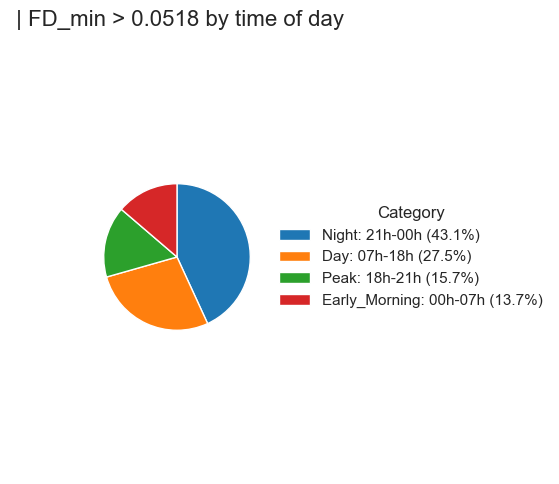

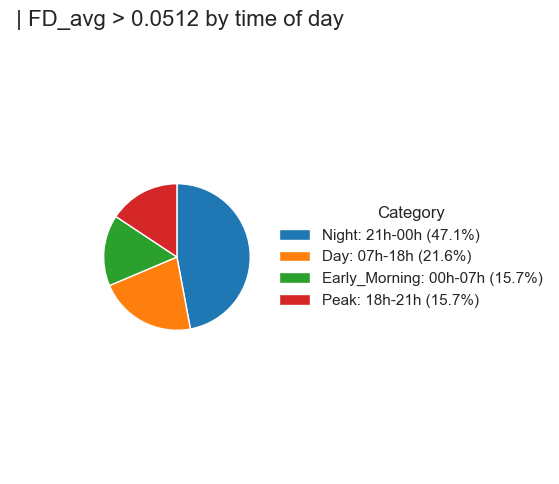

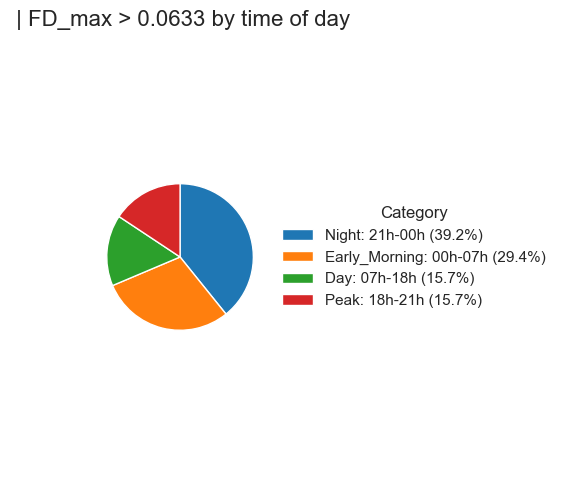

In [19]:
create_pie_chart_by_time_type_sns(data_CU, "FD_min", "flag_FD_min", p95_fd_min)
create_pie_chart_by_time_type_sns(data_CU, "FD_avg", "flag_FD_avg", p95_fd_avg)
create_pie_chart_by_time_type_sns(data_CU, "FD_max", "flag_FD_max", p95_fd_max)

In [20]:
def create_pie_chart_by_weekday_sns(
    df,
    column,
    flag_column,
    threshold_value,
    phase="",
    ax=None,
    startangle=90,
    figsize=(5, 5),
    legend_title="Weekday",
    title_fontsize=16,
    title_pad=10
):
    sns.set_theme(style="white")

    order = [
        "Monday", "Tuesday", "Wednesday",
        "Thursday", "Friday", "Saturday", "Sunday"
    ]

    df = df.copy()
    df[flag_column] = np.where(df[column] > threshold_value, 1, 0)
    mask = df[flag_column] == 1

    s = df.loc[mask, "Weekday_EN"].astype(
        pd.CategoricalDtype(categories=order, ordered=True)
    )
    counts = s.value_counts(sort=False)
    counts = counts[counts > 0]

    if counts.sum() == 0:
        if ax is None:
            _, ax = plt.subplots(figsize=figsize)
        ax.text(0.5, 0.5, "No data", ha="center", va="center", fontsize=12)
        ax.set_title(f"{phase} | {column} > {threshold_value}", fontsize=title_fontsize, pad=title_pad)
        ax.axis("off")
        return ax

    # Ordenar em ordem decrescente
    counts = counts.sort_values(ascending=False)
    values = counts.values
    labels = counts.index.tolist()
    total = values.sum()
    percentages = values / total * 100

    legend_labels = [
        f"{label} ({pct:.1f}%)"
        for label, pct in zip(labels, percentages)
    ]

    if ax is None:
        _, ax = plt.subplots(figsize=figsize)

    colors = sns.color_palette("tab10", len(values))

    wedges = ax.pie(
        values,
        labels=None,
        startangle=startangle,
        counterclock=False,
        colors=colors,
        wedgeprops={"linewidth": 1, "edgecolor": "white"},
    )[0]

    ax.axis("equal")
    ax.set_title(f"{phase} | {column} > {threshold_value:.4f} by weekday",
                 fontsize=title_fontsize,
                 pad=title_pad)

    ax.legend(
        wedges,
        legend_labels,
        title=legend_title,
        loc="center left",
        bbox_to_anchor=(1.05, 0.5),
        frameon=False,
    )

    plt.tight_layout()
    return ax


<Axes: title={'center': ' | FD_max > 0.0633 by weekday'}>

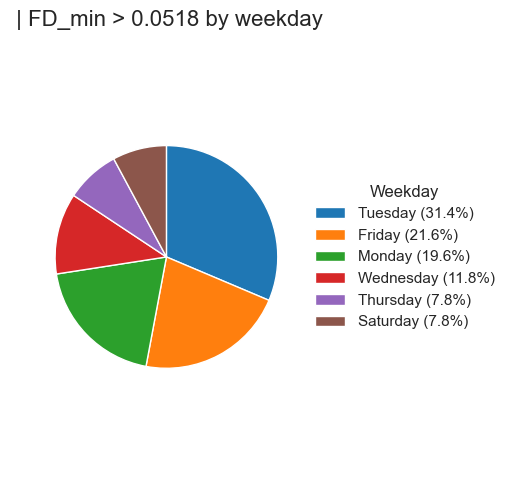

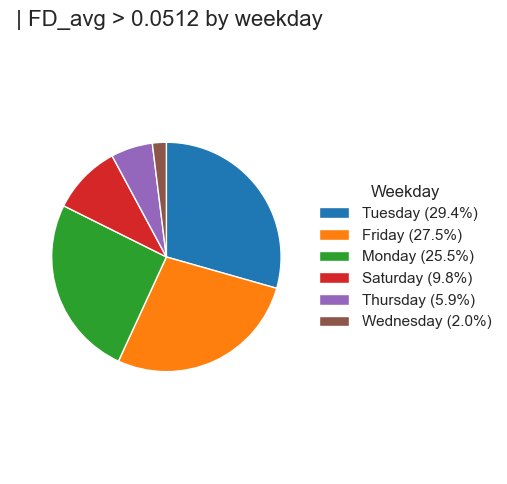

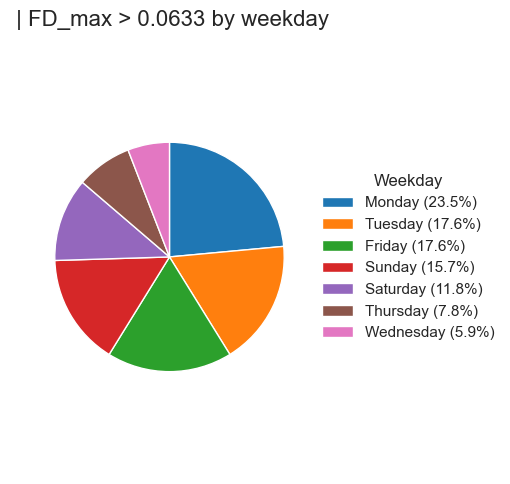

In [21]:
create_pie_chart_by_weekday_sns(data_CU, 'FD_min', 'flag_FD_min', p95_fd_min)
create_pie_chart_by_weekday_sns(data_CU, 'FD_avg', 'flag_FD_avg', p95_fd_avg)
create_pie_chart_by_weekday_sns(data_CU, 'FD_max', 'flag_FD_max', p95_fd_max)